# Amadeus Data Science Challente

## Exercise 3. Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

- **Bonus point**: Solving this problem using pandas (instead of any other approach)

## Estrategia para resolverlo
1. Get familiar with data
    - Select the columns of interest
    - What to do with NaN?


2. Make action plan
    - Develop the code that works with a sample


3. Adjust the code to work with Big data
    - Test big data approach on a sample


4. Run program with big data
    - Use *chunks* for large datasets

### 1. Get familiar with data

In [1]:
import pandas as pd

In [2]:
cd /home/dsc/Data/challenge

/home/dsc/Data/challenge


In [3]:
ls

bookings.csv.bz2       bookings_sample.csv.bz2  top_airports.csv
bookings_sample_2.csv  searches.csv.bz2


In [8]:
#Se lee el archivo y se seleciona una muestra de 10 líneas solo para ver el head
s = pd.read_csv("./searches.csv.bz2", nrows=10)
s.head

<bound method NDFrame.head of   Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
0  2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c1...                                                                                                                                                                                                                                                                                                                                                                                                   

In [11]:
#Se ve que el sep="^". 
#Se amplía ya a una muestra de 10.000 líneas
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000)
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
8928,2013-01-09,00:43:38,MPT,b695299cc14ddcd1e31f1c922b3e258c,US,XNA,UIO,1,2,XNA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SJC
5803,2013-01-06,20:07:22,MPT,50c54b52322080d2c257390f714f91bd,ES,MAD,LIL,0,1,MAD,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
4981,2013-01-05,13:51:57,MPT,b505896ae14ec1bd018d0dc018089272,RU,MOW,DUS,0,1,MOW,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MOW
4953,2013-01-05,13:52:35,FCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0,1,RUH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
444,2013-01-01,12:58:11,AWC,c6010b6d54829ef67840d07fdd1ce5bf,GR,ATH,SKG,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ATH


In [5]:
s.shape

(10000, 45)

In [14]:
pd.set_option("display.max_columns", None)

In [26]:
s.isnull().sum()

Date                    0
Time                    0
TxnCode                 0
OfficeID                0
Country                 0
Origin                  0
Destination             0
RoundTrip               0
NbSegments              0
Seg1Departure           0
Seg1Arrival             0
Seg1Date               27
Seg1Carrier          5953
Seg1BookingCode      8857
Seg2Departure        2804
Seg2Arrival          2804
Seg2Date             2839
Seg2Carrier          7130
Seg2BookingCode      9002
Seg3Departure        9466
Seg3Arrival          9466
Seg3Date             9469
Seg3Carrier          9483
Seg3BookingCode      9492
Seg4Departure        9560
Seg4Arrival          9560
Seg4Date             9561
Seg4Carrier          9562
Seg4BookingCode      9564
Seg5Departure        9897
Seg5Arrival          9897
Seg5Date             9897
Seg5Carrier          9897
Seg5BookingCode      9897
Seg6Departure        9942
Seg6Arrival          9942
Seg6Date             9942
Seg6Carrier          9942
Seg6BookingC

In [22]:
s.describe(include="all")

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-08,16:11:01,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,VR,J,AMS,TXL,2013-02-01,NV,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [23]:
#Se ve el tipo de datos con los que se cuenta
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

- Se puede ver que la fecha no es de tipo Date: habrá que convertirla

- Como en el otro ejercicio las había columnas con nombre de espacios en blanco, compruebo que en este no ocurra

In [24]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## 1.2. Selección de columnas de interés
- Debido al enunciado del ejercicio, después de estudiar las columnas debo seleccionar las de interés:
    - 'Destination' y 'Date'
- ¿Qué estrategia hacer con los NaN?
    - Se va a realizar un drop

In [23]:
#Leo el dataset con las columnas de interés
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])

#Realizo un drop de los NaN
s.dropna(inplace=True)

#Realizo un head para ver cómo quedan mis datos
s.head(5)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


- Para evitar volver a tener problemas con espacios en blanco en el código de los aeropuertos, creo una lista para comprobarlo con 10 registros aleatorios.
    - Esta vez parece que no hay errores

In [24]:
list(s["Destination"].sample(10))

['DEL', 'MNL', 'CAI', 'LON', 'HYD', 'SVQ', 'PTP', 'ICN', 'BUE', 'MIL']

- Vuelvo a comprobar el tipo de dato de date
    - Hay que transformarlo

In [32]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


## 2. Action plan
- Primero se debe filtrar por los tres aeropuertos: Barcelona, Madrid y Málaga
- Se debe transformar la fecha a su formato fecha adecuado
- Una vez transformada, se debe extraer el mes
- Se debe hacer un 'groupby' por aeropuerto y año/mes
- Se hace un count
- Se hace un plot


- Puedo parsear la fecha al cargar el dataset

In [27]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, parse_dates=["Date"], usecols=["Destination","Date"])
s.dropna(inplace=True)
s.head(5)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [28]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null datetime64[ns]
Destination    10000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 234.4+ KB


- O como solo me interesa mes y año, puedo formatear mediante método string
    - En el ejemplo de debajo se incluye un `copy` en el código para evitar que no apunten 's' y 's2' al mismo punto en la memoria y que no me sobreescriba los cambios afectando al original.
    - Además, se añade el método `isin` para filtrar una lista por múltiples valores.

- **Mucho ojo** si se realiza de esta manera, ya que si, como se muestra a continuación, piso la columna 'Date' y sobreescribo los datos en ella, al tener dos columnas y realizar un groupby, no me realizará una cuenta debido a lo que parece un bug de Python

In [86]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
s2["Date"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Date"]).count()
s_gr

,
Destination,Date
AGP,2013-01
BCN,2013-01
MAD,2013-01


**¿Cómo solucionarlo?**
- Hay tres maneras:
    - Haciendo que la conversión de fechas se encuentre en una nueva columna. Así tendrá tres columnas y podrá hacer la cuenta
    - O volviendo a meter uno de los elementos del groupby para que realice la cuenta
    - O metiendo un `size`

**Método añadiendo una columna extra**

In [30]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
s2["Year_month"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Year_month"]).count()
s_gr

,,Date
Destination,Year_month,
AGP,2013-01,48
BCN,2013-01,162
MAD,2013-01,125


**Método añadiendo 'Destination' como filtro**

In [31]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
s2["Date"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Date"])["Destination"].count()
s_gr

Destination  Date   
AGP          2013-01     48
BCN          2013-01    162
MAD          2013-01    125
Name: Destination, dtype: int64

**Método metiendo un `size`**

In [32]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
s2["Date"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Date"]).size()
s_gr

Destination  Date   
AGP          2013-01     48
BCN          2013-01    162
MAD          2013-01    125
dtype: int64

- El resultado devuelto es diferente porque no tiene índice
    - Para solucionarlo, se añade un `reset_index`

In [90]:
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000, usecols=["Destination","Date"])
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
s2["Year_month"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Year_month"]).count().reset_index()
s_gr

,Destination,Year_month,Date
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


- A continuación se agrupa el código explicado:

In [33]:
#Se carga el dataset con las columnas necesarias
s = pd.read_csv("./searches.csv.bz2", sep="^", nrows=100000, usecols=["Destination","Date"])

#Se realiza un dropna
s.dropna(inplace=True)

#Se filtran múltiples valores mediante 'isin'
s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()

#Se convierte a formato fecha
s2["Year_Month"] = s2["Date"].str[0:7]
s_gr = s2.groupby(["Destination","Year_Month"]).count().reset_index()
s_gr

,Destination,Year_Month,Date
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


- Para realizar el ploteo adecuadamente voy a crear una pivot table

In [38]:
#Antes cambio el nombre de la columna 'Date' por 'Count'
s_gr = s_gr.rename(columns={"Date":"Count"})

#Realizo la pivot table
plot_ready = s_gr.pivot(index="Year_Month", columns="Destination", values="Count")

#Muestro por pantalla la pivot table
plot_ready

Destination,AGP,BCN,MAD
Year_Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


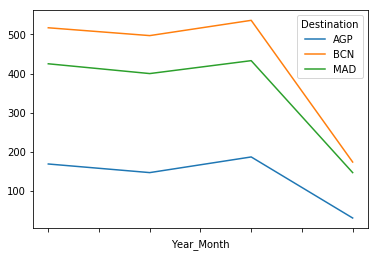

In [39]:
#Realizo el plot de las 10.000 muestras
%matplotlib inline
plot_ready.plot()

- Como veo que funciona, voy a comenzar a extrapolarlo al Big Data
    - **Primero voy a trabajar sobre una muestra de 10.000 líneas**
        - Añado chunksize
        - Creo un pd.DataFrame que agrupe los chunks (all_chunks)
        - Añado un bucle
        - Hago que el resultado de cada bucle haga un append a (all_chunks)
        - Tengo que sumar los resultados totales de cada iteración para que se agrupen. Lo llamo 'all_chunks_gr'

In [40]:
cd /home/dsc/Data/challenge

/home/dsc/Data/challenge


0
1
2
3


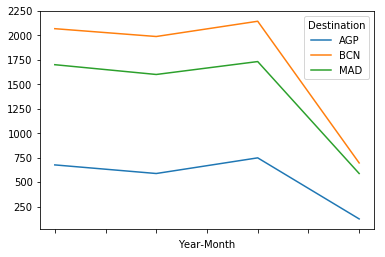

In [41]:
import pandas as pd
%matplotlib inline

all_chunks=pd.DataFrame()
si=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^", chunksize=30000, nrows=100000 )

for index, value in enumerate(si):
    print(index)
    s=s.dropna()
    s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
    s['Year-Month']=s['Date'].str[:7]
    s_gr=s.groupby(["Year-Month", "Destination"]).count().reset_index()
    all_chunks=all_chunks.append(s_gr)

all_chunks_gr=all_chunks.groupby(["Year-Month", "Destination"]).sum().reset_index()

all_chunks_gr=all_chunks_gr.rename(columns={'Date':'Count'})
plot_ready=all_chunks_gr.pivot('Year-Month', 'Destination', 'Count')
plot_ready.plot()

- Como veo que funciona, voy a extraploarlo al Big Data.
    - Elimino `nrows`
    - Aumento el `chunksize`

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


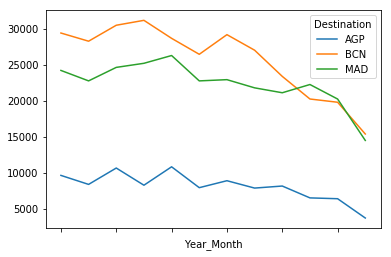

In [42]:
import pandas as pd
%matplotlib inline

all_chunks=pd.DataFrame()
si = pd.read_csv("./searches.csv.bz2", sep="^",
                usecols=["Destination","Date"],
                chunksize=1000000)


for index, value in enumerate(si):
    print(index)
    s = value.dropna()
    s2 = s[s["Destination"].isin(["MAD","BCN","AGP"])].copy()
    s2["Year_Month"] = s2["Date"].str[0:7]
    s_gr = s2.groupby(["Destination","Year_Month"]).count().reset_index()
    all_chunks = all_chunks.append(s_gr)
    
all_chunks_gr = all_chunks.groupby(["Destination","Year_Month"]).sum().reset_index()
all_chunks_gr = all_chunks_gr.rename(columns={"Date":"Count"})
plot_ready = all_chunks_gr.pivot(index="Year_Month", columns="Destination", values="Count")
plot_ready.plot()

In [44]:
plot_ready

Destination,AGP,BCN,MAD
Year_Month,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147
